In [2]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import scanpy as sc

from matplotlib import cm
import matplotlib.pyplot as plt

import sys
sys.path.append("../../lib")
from stpalette import palette1
from plots import simpleCorrPlot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model = 'WM4007'

In [4]:
dataPath = '../../data/'

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
ids

['WM4007_T0_S1_ST',
 'WM4007_T0_S2_ST',
 'WM4007_T1_S1_ST',
 'WM4007_T1_S2_ST',
 'WM4007_T2_S1_ST',
 'WM4007_T2_S2_ST',
 'WM4007_T3_S1_ST',
 'WM4007_T3_S2_ST',
 'WM4007_T4_S1_ST',
 'WM4007_T4_S2_ST',
 'WM4007_TC_S1_ST',
 'WM4007_TC_S2_ST']

In [5]:
palette1.update({id: cm.terrain(0.01 + i/len(ids)) for i, id in enumerate(ids)})

# Load pre-processed data

In [7]:
index_after_mouse_filtered = pd.read_csv(dataPath + 'df_index_filtered_with_mouse_genes_%s.csv' % model, index_col=0).index

In [9]:
ad_all = sc.read(dataPath + 'ad_all_scaled_unfiltered_st_%s.h5ad' % model)
print(ad_all.shape)

ad_all = ad_all[index_after_mouse_filtered, ad_all.var['is_human_gene'].values]
print(ad_all.shape)

(18110, 34249)
(11990, 17788)


# Correlation of counts across samples

### Correlation across technical replicates

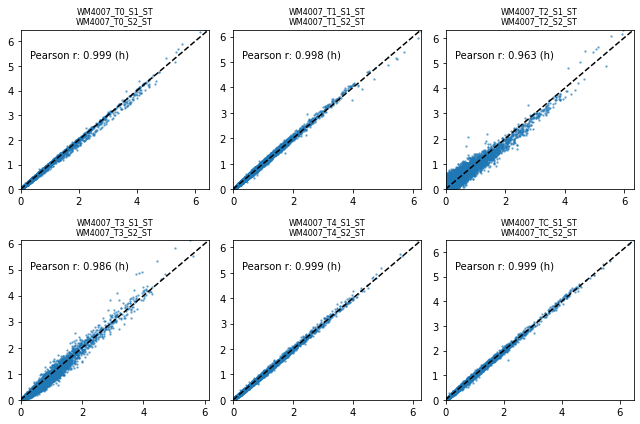

In [10]:
ni, nj = 2, 3
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[1], axs[0, 0], ad_all)
simpleCorrPlot(ids[2], ids[3], axs[0, 1], ad_all)
simpleCorrPlot(ids[4], ids[5], axs[0, 2], ad_all)

simpleCorrPlot(ids[6], ids[7], axs[1, 0], ad_all)
simpleCorrPlot(ids[8], ids[9], axs[1, 1], ad_all)
simpleCorrPlot(ids[10], ids[11], axs[1, 2], ad_all)

fig.tight_layout()

### Correlation across biological replicates 

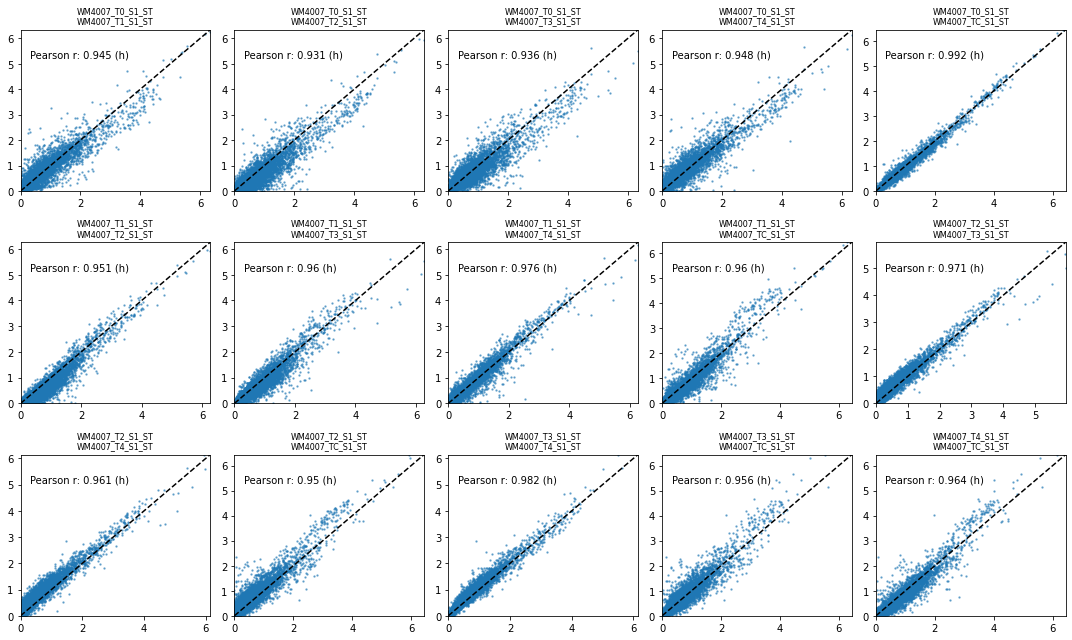

In [11]:
ni, nj = 3, 5
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[2], axs[0, 0], ad_all)
simpleCorrPlot(ids[0], ids[4], axs[0, 1], ad_all)
simpleCorrPlot(ids[0], ids[6], axs[0, 2], ad_all)
simpleCorrPlot(ids[0], ids[8], axs[0, 3], ad_all)
simpleCorrPlot(ids[0], ids[10],axs[0, 4], ad_all)

simpleCorrPlot(ids[2], ids[4], axs[1, 0], ad_all)
simpleCorrPlot(ids[2], ids[6], axs[1, 1], ad_all)
simpleCorrPlot(ids[2], ids[8], axs[1, 2], ad_all)
simpleCorrPlot(ids[2], ids[10],axs[1, 3], ad_all)

simpleCorrPlot(ids[4], ids[6], axs[1, 4], ad_all)

simpleCorrPlot(ids[4], ids[8], axs[2, 0], ad_all)
simpleCorrPlot(ids[4], ids[10],axs[2, 1], ad_all)

simpleCorrPlot(ids[6], ids[8], axs[2, 2], ad_all)
simpleCorrPlot(ids[6], ids[10],axs[2, 3], ad_all)

simpleCorrPlot(ids[8], ids[10],axs[2, 4], ad_all)

fig.tight_layout()

# Save data object

In [13]:
ad_all.write(dataPath + 'ad_all_scaled_filtered_st_%s.h5ad' % model)